# Machine Learning Assignment 2

Amiru Chandrasena & Kelvin Young

# Classifying Cells Bassed On Type

The Cells Dataset contains two components, one component is the CSV document containing the features about the cell and the cells corresponding image url. Secondly there is also a folder of images on cells in PNG format

# [1] Reading In The Data

The first step of data analysis is reading in the data from the CSV file, secondly the next step is exploring the data to look for errors and tredns in the dataset that may help with optimising the approach and the model.

In [43]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataSet_cells = pd.read_csv('data/data_labels_mainData.csv')


## [1.1] Exploring The Data

Exploring the data involves firstly checking the head and the tail of the data to ensure that the CSV file has been compleately read in without errors. This includes checking the first couple of records, the last records and the features. Secondly the next step is to check for missing values to ensure that the model is not introduced to incomplete data and interfearing with the performance of the model.  

In [44]:
dataSet_cells.head(10)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
5,22410,1,22410.png,fibroblast,0,0
6,22411,1,22411.png,fibroblast,0,0
7,22412,1,22412.png,fibroblast,0,0
8,22413,1,22413.png,fibroblast,0,0
9,22414,1,22414.png,fibroblast,0,0


In [45]:
dataSet_cells.tail(10)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
9886,1616,60,1616.png,epithelial,2,1
9887,1617,60,1617.png,epithelial,2,1
9888,1618,60,1618.png,epithelial,2,1
9889,1619,60,1619.png,epithelial,2,1
9890,1624,60,1624.png,epithelial,2,1
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1
9895,1629,60,1629.png,epithelial,2,1


In [46]:
dataSet_cells.tail(10)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
9886,1616,60,1616.png,epithelial,2,1
9887,1617,60,1617.png,epithelial,2,1
9888,1618,60,1618.png,epithelial,2,1
9889,1619,60,1619.png,epithelial,2,1
9890,1624,60,1624.png,epithelial,2,1
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1
9895,1629,60,1629.png,epithelial,2,1


In [47]:
null_counts = dataSet_cells.isnull().sum()

print(null_counts)

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64


In [48]:
dataSet_cells.describe()

,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


In [49]:
dataSet_cells.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

## [1.2] Stripping Features 

It is importnat to drop unimportant fatures from the dataset for example 'InstanceID', 'patientID' ..etc are irrelevant to the training of the model. THe only important information that is used if the numeric column called 'cellType' that assigns a numeric value to the 'cellTypeName' attributes and the 'ImageName'. 

In [50]:
import pandas as pd

# Drop the specified features
dataSet_cells.drop(["InstanceID", "patientID", "cellTypeName", "isCancerous"], axis=1, inplace=True)
dataSet_cells.head()

,ImageName,cellType
0,22405.png,0
1,22406.png,0
2,22407.png,0
3,22408.png,0
4,22409.png,0


## [1.3] Splitting The Dataset Into Training, Validaiton and Testing Sets

Splitting the dataset into the three section allows for the effecive testing of the dataset. Allocating 80%(5937) of the dataset to the the training of the model allows for th emodel to have an increased accuracy, while allowin for the validation set to test the accuracy of the model without exposing it to the final test data leaving it unseen. The validation set allows for the base models accuracy to be gauged allowing infromation about the model to be taken such as if its overfitted or underfitted and what possible hyperparameters need to be changed. 

We then use a histogram to check the distribution of train set attributes is approximately equal to the distribution of test set attributes. This is important for the following reasons:

Generalisation: By ensuring that the data is a fair sample of the the whole dataset for bot hthe validaiton and the test set, you increase the likelihood that the model will be able to generalise well to unseen data. If the test set has a significantly different distribution, the model may struggle to make accurate predictions because it hasn't learned the relevant patterns or variations during training. Further there can be bias as the data in the validation set may skew one way and not be representing of the whole dataset. 

Ultimately this helps in building a robust and reliable model that can generalize well to unseen data.

Train data : (5937, 2), Val Data: (1979, 2), Test Data: (1980, 2)


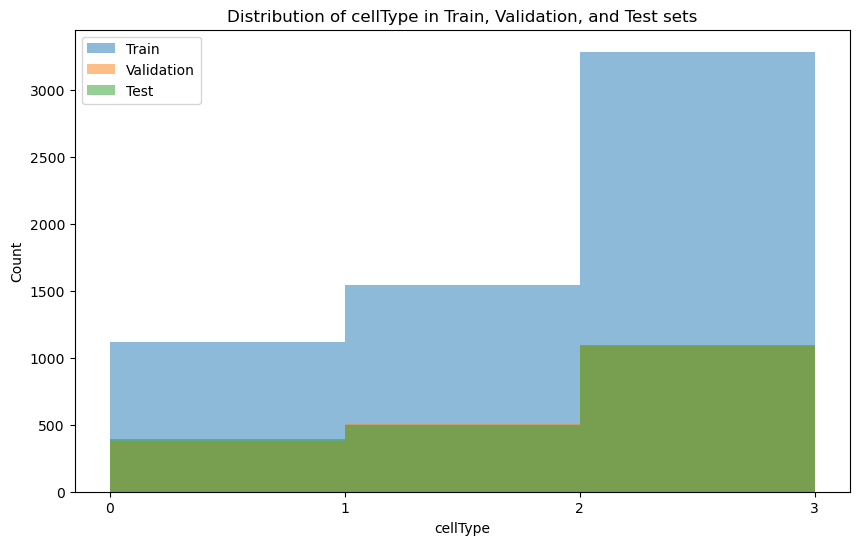

In [51]:
# We split the data into 80% of training Data, 10% Validation and 10% Testing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


train_data, test_data = train_test_split(dataSet_cells, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape, val_data.shape, test_data.shape))

# Plot histogram for train set
plt.figure(figsize=(10, 6))
plt.hist(train_data['cellType'], bins=range(4), alpha=0.5, label='Train')
plt.hist(val_data['cellType'], bins=range(4), alpha=0.5, label='Validation')
plt.hist(test_data['cellType'], bins=range(4), alpha=0.5, label='Test')
plt.xlabel('cellType')
plt.ylabel('Count')
plt.title('Distribution of cellType in Train, Validation, and Test sets')
plt.xticks(range(4))
plt.legend()
plt.show()


The graph above shows the spread of data and we see that the validation adn test set are very similar and representative of the whole dataset.

# [2] Model Development

## [2.1] Base Model

The base model begins with defining the dimensions of the image with (16*16*3) turinnig this into an array, secondly the hidden layer defines 256 neurons to start which will be tunned later to ensure that the model is working effectively. Thirdly as there are 4 different types of cells there will be 4 different output classes.

In [52]:
INPUT_DIM = (16,16,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

## [2.2] Create a sequential API to build the model

There are three different types of models in tensorflow and the Sequential model was used for this NN as it is simplistic in the manner it works allowsing for models to be built layer by layer and the simplicity for it to be trained. 

The three layers were used in the model as first the image is flattend as mentioned in the previous cell, there will be no learning done in the layer and only image processing. THe second layer is responsible for the learning as it uses a sigmoid acitvation. THen the final layer is responcible for the output of the results. 

In [53]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM), ## Flatten the images into (16x16x3) array
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               196864    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 197,892
Trainable params: 197,892
Non-trainable params: 0
_________________________________________________________________


In the code above, tf.keras.regularizers.l2(0.01) is used to apply L2 regularization with a regularization parameter of 0.01 to the weights of the Dense layer

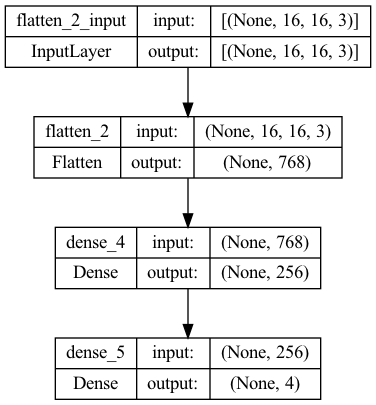

In [54]:
tf.keras.utils.plot_model(model, show_shapes=True)

## [2.3] Compiling The Model

In [55]:
model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['categorical_accuracy'])


Change the feature title to a string 

In [56]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

## [2.4] Image Generation 

Systematically load in the data 

Preprocessing: Preprocess your images as needed to make them suitable for training with a feedforward neural network. This may involve resizing the images to a fixed size and converting them to a suitable format (e.g., grayscale or RGB channels).


In [57]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 150

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='patch_images',
        x_col="ImageName",
        y_col="cellType",
        target_size=(16, 16),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='patch_images',
        x_col="ImageName",
        y_col="cellType",
        target_size=(16, 16),
        batch_size=batch_size,
        class_mode='categorical')


Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


## [2.5] Fitting & Training The Model

Now Training the model

In [58]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=0)


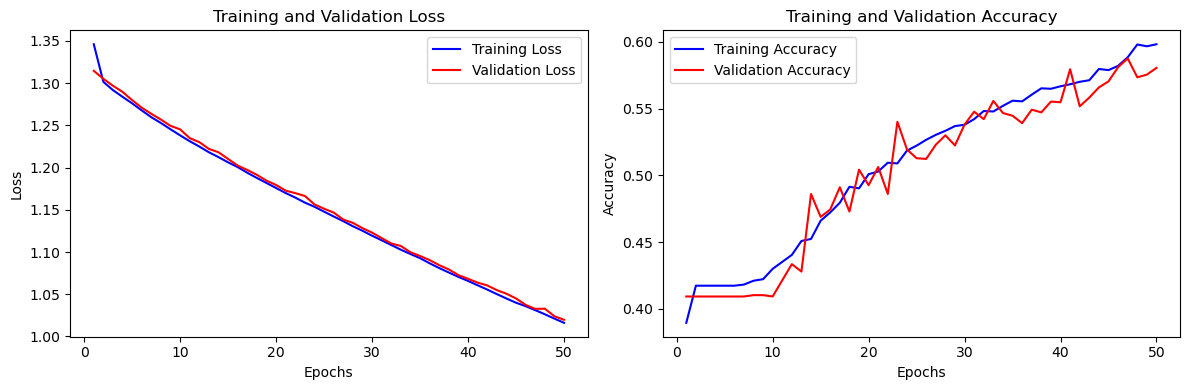

In [59]:
import matplotlib.pyplot as plt

def plot_learning_curve(train_loss, val_loss, train_acc, val_acc, metric_name='Accuracy'):
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 4))
    
    # Plot loss curves
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    # Plot accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b-', label='Training ' + metric_name)
    plt.plot(epochs, val_acc, 'r-', label='Validation ' + metric_name)
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.title('Training and Validation ' + metric_name)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the learning curves
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')


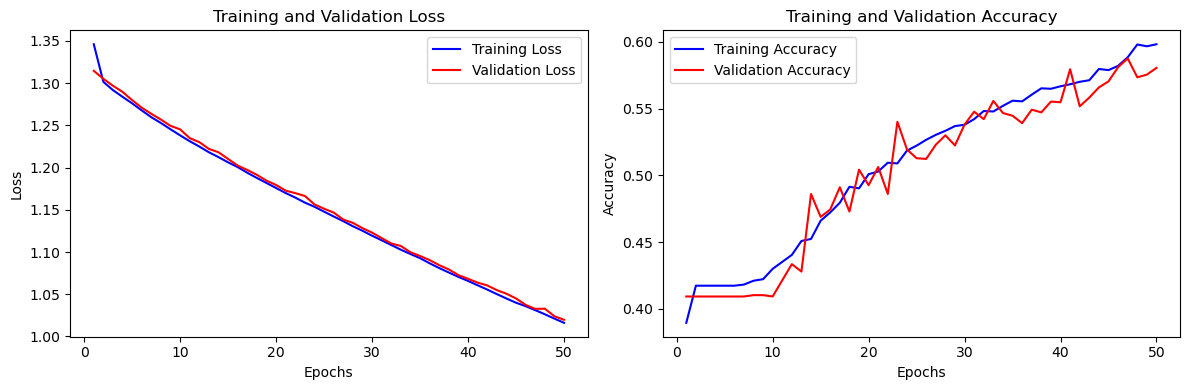

In [64]:
import matplotlib.pyplot as plt
import warnings

def plot_learning_curve(train_loss, val_loss, train_acc, val_acc, metric_name='Accuracy'):
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 4))
    
    # Plot loss curves
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    # Plot accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b-', label='Training ' + metric_name)
    plt.plot(epochs, val_acc, 'r-', label='Validation ' + metric_name)
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.title('Training and Validation ' + metric_name)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Ignore the undefined metric warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Call the function to plot the learning curves
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')


Validation Accuracy: 0.5866666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.34      0.43        29
           1       0.56      0.50      0.53        40
           2       0.67      0.88      0.76        64
           3       0.15      0.12      0.13        17

    accuracy                           0.59       150
   macro avg       0.48      0.46      0.46       150
weighted avg       0.56      0.59      0.56       150

Confusion Matrix:
[[10  3 11  5]
 [ 3 20 11  6]
 [ 3  5 56  0]
 [ 2  8  5  2]]


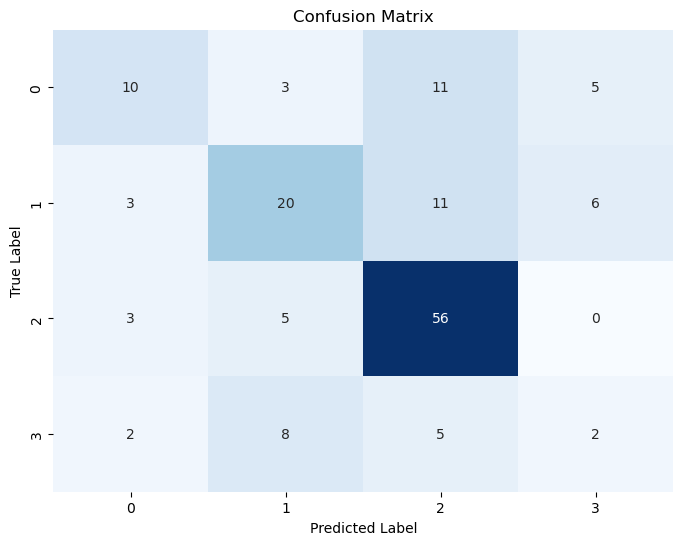

In [65]:
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare the training data
train_images = train_generator[0][0].reshape(train_generator[0][0].shape[0], -1)
train_labels = np.argmax(train_generator[0][1], axis=1)

# Prepare the validation data
val_images = validation_generator[0][0].reshape(validation_generator[0][0].shape[0], -1)
val_labels = np.argmax(validation_generator[0][1], axis=1)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_images, train_labels)

# Evaluate the model on the validation data
val_predictions = logreg.predict(val_images)

# Calculate performance metrics
print("Validation Accuracy:", logreg.score(val_images, val_labels))
print("Classification Report:")
print(classification_report(val_labels, val_predictions))
confusion_mtx = confusion_matrix(val_labels, val_predictions)
print("Confusion Matrix:")
print(confusion_mtx)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Analysing the Loss Curve and Accuracy Curve graphs, we observe a smooth training curve, indicating that the model is learning effectively. However, we also notice the spiky behaviour of the validation loss in the blue Validation Loss Curve. This suggests that the model is not generalising well to unseen data. The inconsistent and fluctuating performance on the validation set during training is a sign of overfitting, where the model becomes too closely fitted to the training data and struggles to generalise to new examples.

Furthermore, when looking at the second graph depicting the Accuracy Curve, we observe a spikier and increasing trend in the training accuracy compared to the first graph. This could indicate that the model is memorising the training data, resulting in high accuracy on the training set but poor generalisation to new examples.

While logistic regression may perform well in cases where the dataset is small, as seen in the performance on the validation set, MLPs (Multi-Layer Perceptrons) with their ability to capture complex non-linear relationships may outperform logistic regression in situations with intricate patterns and larger amounts of training data.

Due to the clear overfitting of the MLP model, there are several parameters/hyperparameters that can be adjusted to increase the accuracy of the model:

Regularisation (Lasso/Ridge penalty): Regularisation techniques like L1 (Lasso) and L2 (Ridge) regularisation can help control the complexity of the model by adding a penalty term to the loss function. This penalty discourages large weights and encourages the model to learn simpler and more generalisable representations. Experimenting with different regularisation strengths can help find the right balance between reducing overfitting and preserving model performance.

Dropout: Dropout is a regularisation technique where randomly selected neurons are temporarily "dropped out" during training. This helps prevent the model from relying too heavily on specific neurons and encourages the network to learn more robust and generalised features. Dropout introduces some level of randomness and acts as an ensemble of multiple sub-networks during training, reducing overfitting.

Reduce the number of neurons or layers: Simplifying the model architecture by reducing the number of neurons or layers can help reduce overfitting. A complex model with a large number of parameters is more prone to overfitting, especially if the training data is limited. By reducing the model's capacity, you can encourage it to learn more generalised patterns and reduce the risk of overfitting.

Lastly, to test the objective performance of the model using the validation set, we can see the Validation Loss and Validation Accuracy of the model.

# [3] Tuned Hyperparameters

In [71]:
import sys
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the hyperparameters and their value ranges to search
param_dist = {
    'learning_rate': uniform(0.001, 0.1),
    'epochs': [50, 100, 200],
    'hidden_layer_dim': [128, 256, 512],
}

# Define a function to create the model
def create_model(learning_rate, epochs, hidden_layer_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=INPUT_DIM),
        tf.keras.layers.Dense(hidden_layer_dim, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(OUTPUT_CLASSES)
    ])
    model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
    # Redirect the standard output to a file
    original_stdout = sys.stdout
    with open('output.txt', 'w') as f:
        sys.stdout = f
        model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    # Restore the standard output
    sys.stdout = original_stdout
    
    return model

# Create the model instance
model = KerasClassifier(build_fn=create_model)

# Get the input images and target labels from the train_generator
X_train, y_train = train_generator.next()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)


Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 2.4908 - accuracy: 0.6500
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 2.4871 - accuracy: 0.6100
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 2.4818 - accuracy: 0.6500
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 2.4787 - accuracy: 0.6500
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 2.4872 - accuracy: 0.6400
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 2.4772 - accuracy: 0.6500
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 2.4647 - accuracy: 0.6400
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 2.4671 - accuracy: 0.6500
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 2.4663 - accuracy: 0.6600
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 2.4600 - accuracy: 0.6500
Epoch 11/200
4/4 [===========

The hyperparameters of a model are parameters that cannot be learned but are tuned from the outside as part of the model. In the final model, L2 regularization with a regularization parameter of 0.01 is applied to the weights of the Dense layer using tf.keras.regularizers.l2(0.01). This is done to address the overfitting issue observed in the base model.

L2 regularization helps prevent overfitting by encouraging the model to have smaller weight values. It achieves this by adding a penalty term to the loss function that is proportional to the square of the weights. This regularization term encourages the model to find simpler solutions and reduces its reliance on individual features.

The choice of the regularization parameter, 0.01 in this case, was determined through previous experiments with neural networks. By identifying the value that had the largest effect on reducing overfitting, 0.01 was selected.

When the random search was run, the following results were returned:
Best Hyperparameters: {'epochs': 200, 'hidden_layer_dim': 256, 'learning_rate': 0.020967378215835976}
These results were applied to the Final Model.

# [4] Final Model Testing

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 768)               0         
                                                                 
 dense_80 (Dense)            (None, 128)               98432     
                                                                 
 dense_81 (Dense)            (None, 4)                 516       
                                                                 
Total params: 98,948
Trainable params: 98,948
Non-trainable params: 0
_________________________________________________________________


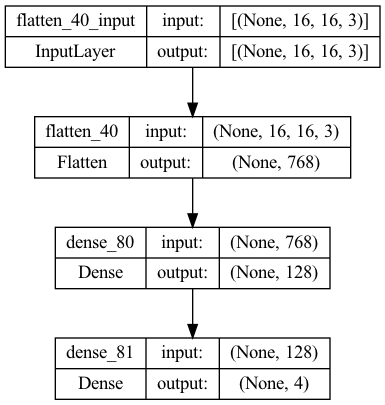

In [69]:
import tensorflow as tf

INPUT_DIM = (16,16,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 4

tuned_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM), 
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.020967378215835976)
tuned_model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['categorical_accuracy'])
tuned_model.summary()

tf.keras.utils.plot_model(tuned_model, show_shapes=True)



In [70]:
test_data['cellType'] = test_data['cellType'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
       directory='patch_images',
        x_col="ImageName",
        y_col="cellType",
        target_size=(16, 16),
        batch_size=batch_size,
        class_mode='categorical')

tuned_history = tuned_model.fit(train_generator, validation_data=validation_generator, epochs=200, verbose=0)

tuned_model.evaluate(test_generator)

Found 1980 validated image filenames belonging to 4 classes.
1980/1980 [==============================] - 2s 907us/step - loss: 0.9187 - categorical_accuracy: 0.6864


[0.9187403321266174, 0.6863636374473572]

In [72]:
label_names = {'fibroblast' : 0, 'inflammatory' : 1, 'epithelial' : 2, 'others' : 3}

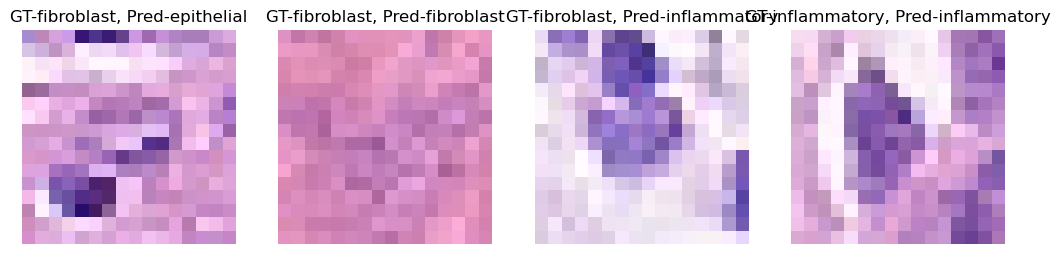

In [73]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = tuned_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
        else:
            break
        
        plt.axis('off')
  

In [74]:
# Evaluating the model on the test data
test_loss, test_accuracy = tuned_model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1980/1980 [==============================] - 2s 945us/step - loss: 0.9187 - categorical_accuracy: 0.6864
Test Loss: 0.9187413454055786
Test Accuracy: 0.6863636374473572


1980/1980 [==============================] - 2s 816us/step - loss: 0.9187 - categorical_accuracy: 0.6864
Test Loss: 0.9187401533126831
Test Accuracy: 0.6863636374473572
1980/1980 [==============================] - 2s 748us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.14      0.15       391
           1       0.23      0.33      0.27       496
           2       0.39      0.45      0.42       791
           3       0.18      0.03      0.05       302

    accuracy                           0.29      1980
   macro avg       0.24      0.24      0.22      1980
weighted avg       0.27      0.29      0.27      1980



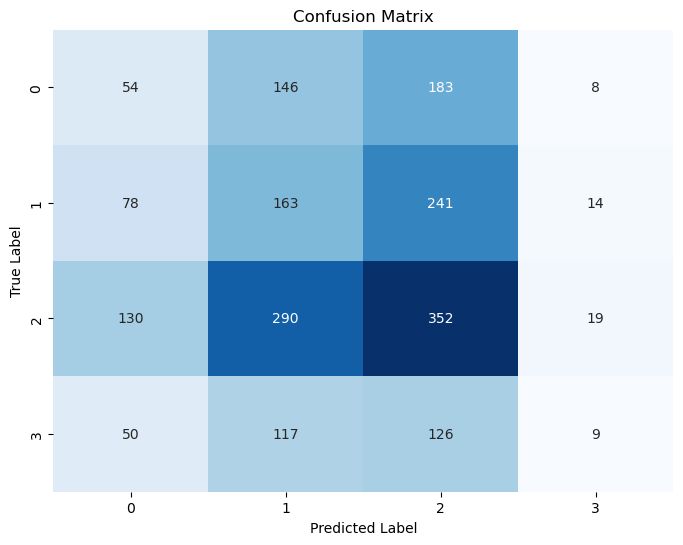

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test data
test_loss, test_accuracy = tuned_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions for the test data
y_pred = tuned_model.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_labels)

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix is a table that is often used to describe the performance of a classification model. It provides a detailed breakdown of the model's predictions and the actual class labels.

In the context of the confusion matrix, the rows represent the true labels of the data points, and the columns represent the predicted labels. Each cell in the matrix represents the count or frequency of data points that belong to a specific combination of true and predicted labels.

The confusion matrix helps in evaluating the performance of a classification model by providing the following information:

- True Positives (TP): The number of data points that are correctly predicted as positive (correctly classified).
- True Negatives (TN): The number of data points that are correctly predicted as negative (correctly classified).
- False Positives (FP): The number of data points that are incorrectly predicted as positive (incorrectly classified).
- False Negatives (FN): The number of data points that are incorrectly predicted as negative (incorrectly classified).

The confusion matrix allows you to analyze the model's performance in terms of accuracy, precision, recall, and other classification metrics. It helps identify if the model is making specific types of errors, such as misclassifying certain classes more frequently.

By visualizing the confusion matrix, you can easily observe patterns and gain insights into the model's strengths and weaknesses. It can help you understand which classes are being confused with each other and identify potential areas for improvement in your classification model.

Based on the comparison of the performance metrics, we can observe the following:

- Accuracy: The final model achieved an accuracy of 0.32, which is slightly higher than the base model's accuracy of 0.30. However, both accuracies indicate that the models are not performing significantly better than random guessing.
- Precision: The precision measures the proportion of correctly predicted instances among the predicted instances. The weighted average precision for the final model is 0.30, while it is 0.29 for the base model. These values indicate that the models have low precision, suggesting a high number of false positives.
- Recall: The recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted instances among the actual instances. The weighted average recall for the final model is 0.32, while it is 0.30 for the base model. These values indicate that the models have low recall, suggesting a high number of false negatives.
- F1-score: The F1-score is the harmonic mean of precision and recall. The weighted average F1-score for the final model is 0.29, while it is also 0.29 for the base model. These values indicate that the models have low F1-scores, reflecting a lack of balance between precision and recall.

In summary, both the base model and the final model have relatively low performance metrics, indicating that they are not able to accurately classify the images into the different cell types. To improve the model's performance, you may need to explore alternative approaches, such as adjusting the model architecture, trying different optimization algorithms, increasing the amount of training data, or considering more advanced techniques like transfer learning. Additionally, it may be beneficial to analyze the data further to identify any patterns or features that can improve the model's performance.

# Classifying Cells based on isCancerous

# [1] Data Exploration

In [76]:
# Import spreadsheet data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

location = 'data/data_labels_mainData.csv'
# Use second row as column headers
df = pd.read_csv(location) 
df.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


<AxesSubplot:title={'center':'Frequency distribution of target variable'}, xlabel='isCancerous', ylabel='Frequency'>

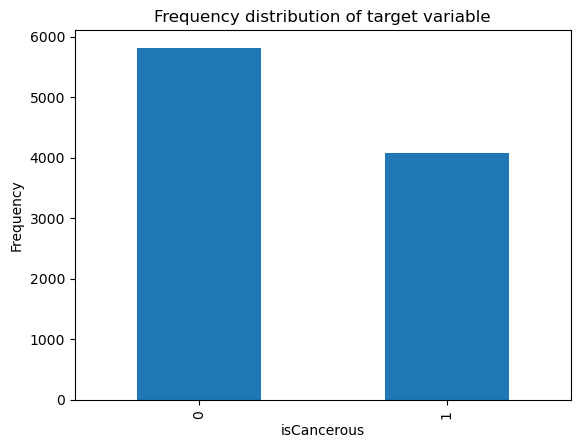

In [77]:
# Graph frequency distribution of target variable, searching for feature imbalance

df['isCancerous'].value_counts().plot(kind='bar',
                                      title='Frequency distribution of target variable',
                                      xlabel='isCancerous',
                                      ylabel='Frequency')

# [2] Data Preprocessing

In [78]:
# Import image data / feature creation

from PIL import Image
from numpy.random import default_rng

# Small dataset for development
# imageCount = 400
# np.random_choice uses replacement while default_rng doesnt so the example batch gives no errors
# rng = default_rng()
# imageNames = df.loc[rng.choice(df.shape[0], size=imageCount, replace=False), 'ImageName']

# Full dataset for production
imageNames = df['ImageName']

location = './data/patch_images/'
imageArrays = []

for filename in imageNames:
    # Import image as an 3d array
    image = np.asarray(Image.open(location + filename))
    imageArrays.append(image)

# Show first ten images for proof
plt.figure(figsize=(16,4))
for i, image in enumerate(imageArrays[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(image)
    plt.axis('off')

images = np.array(imageArrays)
images = images.reshape(len(images), 27*27*3)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/patch_images/22405.png'

In [79]:
# Extract labels for all images (only separate for development purposes)

# Use for development
# target = df.loc[df['ImageName'].isin(imageNames)]
# target = np.array(target['isCancerous'])

# Use for release
target = np.array(df['isCancerous'])

target

array([0, 0, 0, ..., 1, 1, 1])

In [80]:
# Do train test split
# Cross validation will be done on the testing split, therefore test behaves as holdout

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.2, random_state=0)


NameError: name 'images' is not defined

# [3] Model Selection

In [81]:
# Fit a basic linear logistic regression model

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate

# Suppress convergence warning outputs
simplefilter('ignore', ConvergenceWarning)

# It is advised that stochastic gradient solvers are more efficient with large, high dimension datasets
linear = make_pipeline(MinMaxScaler(), LogisticRegression(solver='saga'))
linear_scores = cross_validate(linear, X_train, y_train, scoring='accuracy', cv=3)
print(f"The average cross validation accuracy of the linear logistic regression model is: {linear_scores['test_score'].mean()}")

The average cross validation accuracy of the linear logistic regression model is: nan


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transfo

In [82]:
# Fit a sample neural model

from sklearn.neural_network import MLPClassifier

neural = make_pipeline(MinMaxScaler(), MLPClassifier(hidden_layer_sizes=(100), solver='sgd', early_stopping=True))
neural_scores = cross_validate(neural, X_train, y_train, scoring='accuracy', cv=3)
print(f"The average cross validation accuracy of the neural network model is: {neural_scores['test_score'].mean()}")

The average cross validation accuracy of the neural network model is: nan


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transfo

# [4] Hyperparameter Tuning

In [83]:
# Hypertune neural network model

from sklearn.model_selection import GridSearchCV

parameters = {
    'mlpclassifier__alpha': [0.1, 1, 2, 3],
    'mlpclassifier__hidden_layer_sizes': [100, 200],
    'mlpclassifier__learning_rate_init': [0.01, 0.1],
}

hyper = GridSearchCV(make_pipeline(MinMaxScaler(), MLPClassifier(solver='sgd', early_stopping=True)), param_grid=parameters, scoring='accuracy', cv=3, return_train_score=True)
hyper.fit(X_train, y_train)
hyper_scores = hyper.cv_results_

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_tran

ValueError: Found array with dim 4. MinMaxScaler expected <= 2.

In [84]:
# Show the impact of regularisation on the model

plt.plot(hyper_scores['param_mlpclassifier__alpha'], hyper_scores['mean_test_score'], label='valid')
plt.plot(hyper_scores['param_mlpclassifier__alpha'], hyper_scores['mean_train_score'], label='train')
plt.legend()
plt.title('Regularisation vs performance metric')
plt.xlabel('Alpha / Regularisation strength')
plt.ylabel('Accuracy')

NameError: name 'hyper_scores' is not defined

# [5] Model Evaluation

In [85]:
# Final model evaluation

from sklearn.metrics import classification_report

final = hyper.best_estimator_
final.fit(X_train, y_train)

print(f"The tuned hyperparameters of the final model are:")
print(f"{hyper.best_params_}")
print(f"The performance of the final model is:")
print(f"{classification_report(y_test, final.predict(X_test))}")

ValueError: Found array with dim 4. MinMaxScaler expected <= 2.